# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
There are 51% of male mice and 49% of female mice.
Seems like the capomulin regimen is better compare to others.
The correlation between mouse weight and the average tumor volume is 0.84

 

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(mouse_metadata, study_results, how='outer')


# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [110]:
# Checking the number of mice.
mice=combine_data["Mouse ID"].value_counts()
num_of_mice=len(mice)
num_of_mice


249

In [111]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [112]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mouse_id = pd.DataFrame(duplicate_mice)
all_dup_mouse_id

,0
0,g989


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data[combine_data['Mouse ID'].isin(duplicate_mice)==False]

In [115]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_num_of_mice=len(clean_mice)
clean_num_of_mice

248

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({
    "Tumor_Vol_Mean": mean, 
    "Tumor_Vol_Median": median,
    "Tumor_Vol_Var": variance,
    "Tumor_Vol_Stdev": std,
    "Tumor_Vol_SEM": sem
})
stats_summary


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [117]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
combine_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median",'std','sem','var']})

Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.322552  50.854632  6.507770  0.512884  42.351070
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

## Bar and Pie Charts

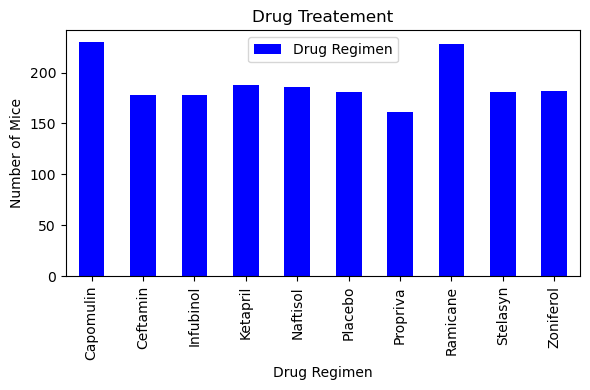

In [118]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_group = combine_data.groupby("Drug Regimen")
drug_group_count = pd.DataFrame(drug_group["Drug Regimen"].count())

drug_group_count.plot(kind="bar", facecolor= "blue", title="Drug Treatement", figsize=(6,4))
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

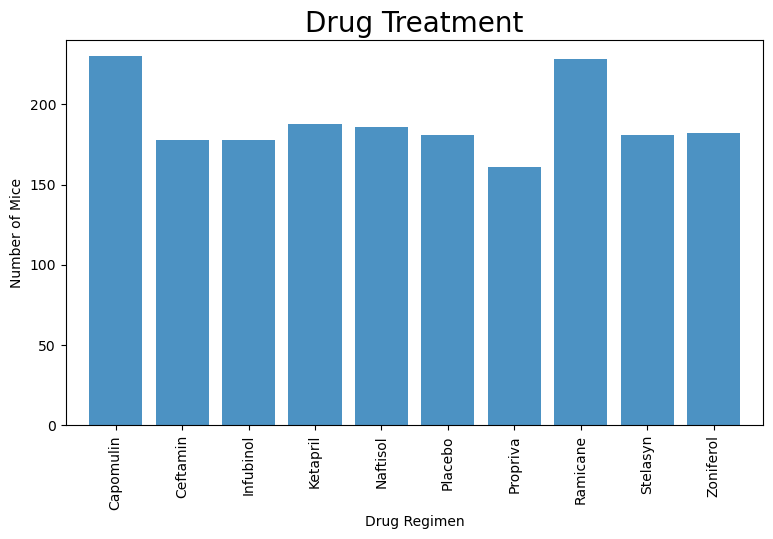

In [119]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each regimen using pyplot.
fig1, ax1 = plt.subplots(figsize=(9,5))
plt.bar(list(drug_group_count.index), drug_group_count["Drug Regimen"], alpha=0.8)

plt.xlim(-0.75, len(drug_group_count.index)-0.25)
plt.ylim(0, max(drug_group_count["Drug Regimen"])+10)
plt.title("Drug Treatment",fontsize = 20)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()

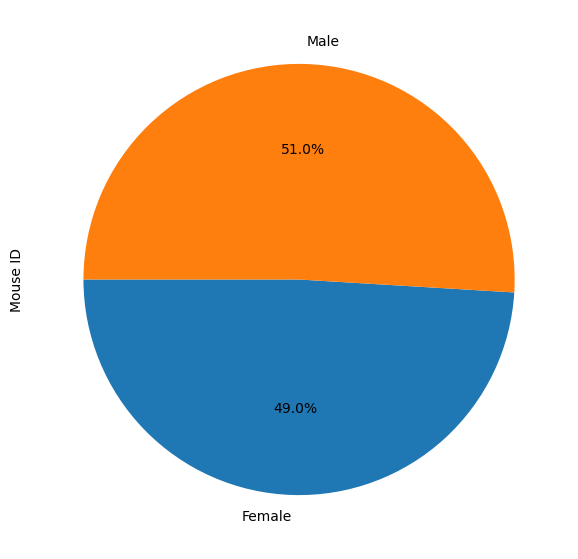

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_data = gender_data[["Sex","Mouse ID"]]

color = ["green", "blue"]
gender_data.plot(kind='pie', y= "Mouse ID", labels= gender_data['Sex'], autopct='%1.1f%%', 
                 legend = False, startangle=180, figsize=(11,7))
plt.show()




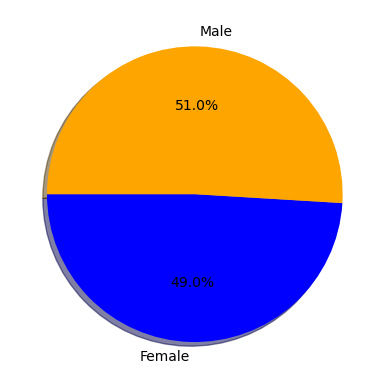

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = gender_data["Mouse ID"]
colors = ["blue","orange"]
plt.pie(pie_data,labels=gender_data['Sex'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= combine_data.groupby('Mouse ID').max()['Timepoint']
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


final_tumor_vol_df = pd.merge(max_timepoint_df, clean_df, on=("Mouse ID","Timepoint"))
final_tumor_vol_df





,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [123]:
#Calculate tumor volume for Capomulin
capomulin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Capomulin"]
capo_tumor_vol = capomulin_df["Tumor Volume (mm3)"]

capomulin_quartiles = capo_tumor_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_IQR = capomulin_upperq-capomulin_lowerq

print(f"lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"upper quartile of Capomulin is: {capomulin_upperq}")
print(f"interquartile range of Capomulin is: {capomulin_IQR}")
print(f"median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_IQR)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_IQR)

print(f"Values below {capomulin_lower_bound} could be outliers")
print(f"Values above {capomulin_upper_bound} could be outliers")

outlier_capo = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < capomulin_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] < capomulin_upper_bound)]
outlier_capo              

lower quartile of Capomulin is: 32.37735684
upper quartile of Capomulin is: 40.1592203
interquartile range of Capomulin is: 7.781863460000004
median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
12,a644,45,Ramicane,Female,7,17,32.978522,1
...,...,...,...,...,...,...,...,...
239,y793,45,Capomulin,Male,17,17,31.896238,2
241,z234,5,Naftisol,Female,19,27,46.129357,1
242,z314,5,Stelasyn,Female,21,28,45.934712,0
243,z435,10,Propriva,Female,12,26,48.710661,0


In [124]:
#Calculate tumor volume for Ramicane
ramicane_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ramicane"]
rami_tumor_vol = ramicane_df["Tumor Volume (mm3)"]

ramicane_quartiles = rami_tumor_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_IQR = ramicane_upperq-ramicane_lowerq

print(f"lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"upper quartile of Ramicane is: {ramicane_upperq}")
print(f"interquartile range of Capomulin is: {ramicane_IQR}")
print(f"median of Ramicane is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_IQR)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_IQR)

print(f"Values below {ramicane_lower_bound} could be outliers")
print(f"Values above {ramicane_upper_bound} could be outliers")

outlier_rami = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < ramicane_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] < ramicane_upper_bound)]


lower quartile of Ramicane is: 31.56046955
upper quartile of Ramicane is: 40.65900627
interquartile range of Capomulin is: 9.098536719999998
median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers


In [125]:
#Calculate tumor volume for Infubinol
infubinol_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Infubinol"]
infu_tumor_vol = infubinol_df["Tumor Volume (mm3)"]

infubinol_quartiles = infu_tumor_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_IQR = infubinol_upperq-infubinol_lowerq

print(f"lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"upper quartile of Infubinol is: {infubinol_upperq}")
print(f"interquartile range of Infubinol is: {infubinol_IQR}")
print(f"median of Infubinol is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_IQR)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_IQR)

print(f"Values below {infubinol_lower_bound} could be outliers")
print(f"Values above {infubinol_upper_bound} could be outliers")

outlier_infu = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < infubinol_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] < infubinol_upper_bound)]      

lower quartile of Infubinol is: 54.04860769
upper quartile of Infubinol is: 65.52574285
interquartile range of Infubinol is: 11.477135160000003
median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers


In [126]:
#Calculate tumor volume for Ceftamin
ceftamin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ceftamin"]
ceft_tumor_vol = ceftamin_df["Tumor Volume (mm3)"]

ceftamin_quartiles = ceft_tumor_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_IQR = ceftamin_upperq-ceftamin_lowerq

print(f"lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"interquartile range of Ceftamin is: {ceftamin_IQR}")
print(f"median of Ceftamin is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_IQR)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_IQR)

print(f"Values below {ceftamin_lower_bound} could be outliers")
print(f"Values above {ceftamin_upper_bound} could be outliers")

outlier_ceft = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < ceftamin_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] < ceftamin_upper_bound)]      

lower quartile of Ceftamin is: 48.72207785
upper quartile of Ceftamin is: 64.29983003
interquartile range of Ceftamin is: 15.577752179999997
median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


In [127]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:

       # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

     # add subset  
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upperr_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    




 

    
  

    
  

    
    


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 87.67 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 87.67 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 87.67 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could be outliers.
Average tumor volume(mm3) for Ceftamin is: 57.75
Number of outliers for Capomulin is: 0


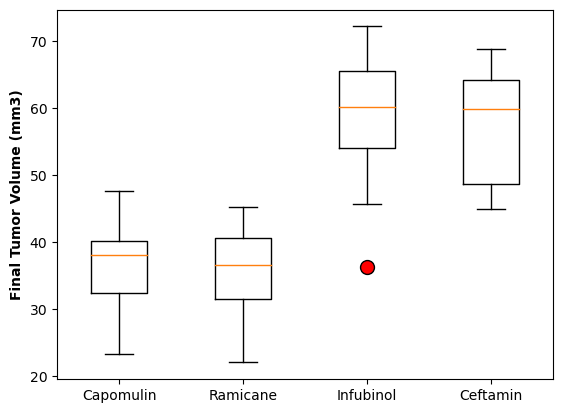

In [128]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})


final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)',fontweight='bold')

plt.show()
plt.close()

## Line and Scatter Plots

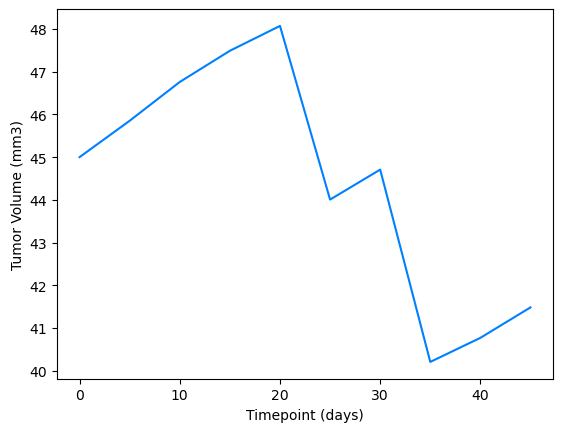

In [129]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'],color='#0080FE')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

plt.close()


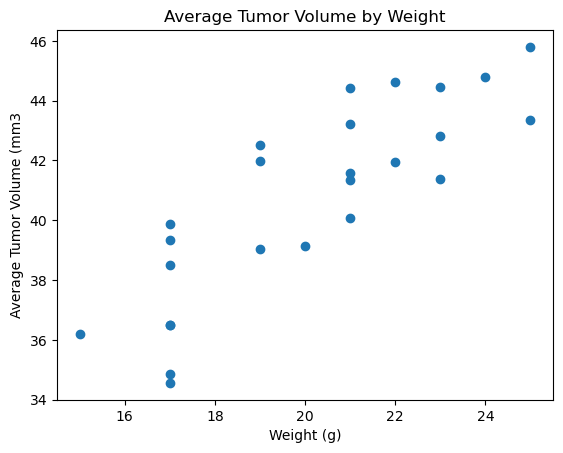

In [130]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combine_data.loc[combine_data['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x,y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3")
plt.title('Average Tumor Volume by Weight')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


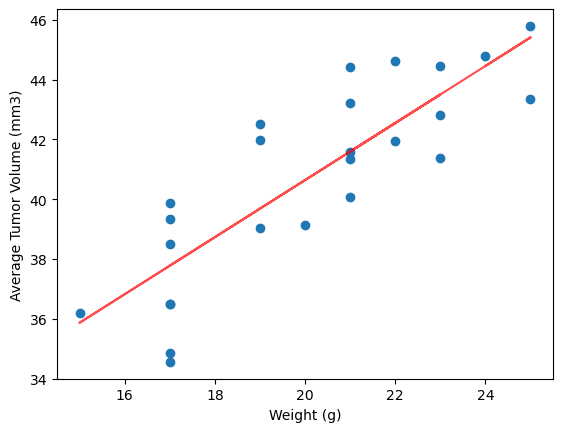

In [132]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = x
y_values = y

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

plt.close()